## 1. Import the Libraries and the Data

In [ ]:
%load_ext jupyter_black
# import the necessary libraries for this project
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

import warnings

warnings.filterwarnings("ignore")

# More will likely be needed later on

RSEED = 42

Download the zip files from the following link and place them in the data folder of your repository: 

https://zindi.africa/competitions/fraud-detection-in-electricity-and-gas-consumption-challenge/data

In [ ]:
# Unzip all files in the 'data' folder
# data_folder = "data"
# for file in os.listdir(data_folder):
#   if file.endswith(".zip"):
#       os.system(f"unzip {os.path.join(data_folder, file)} -d {data_folder}")

In [2]:
# Read the CSV files into pandas DataFrames
df_client = pd.read_csv("data/client_train.csv")
df_invoice = pd.read_csv("data/invoice_train.csv")
df_client_test = pd.read_csv("data/client_test.csv")
df_invoice_test = pd.read_csv("data/invoice_test.csv")

In [3]:
# convert the date columns to date time format
df_invoice_test["invoice_date"] = pd.to_datetime(df_invoice_test["invoice_date"])
df_invoice["invoice_date"] = pd.to_datetime(df_invoice["invoice_date"])

In [ ]:
# Convert the other date column to datetime objects
df_client["creation_date"] = pd.to_datetime(df_client["creation_date"], format="mixed")
df_client_test["creation_date"] = pd.to_datetime(
    df_client_test["creation_date"], format="mixed"
)

In [5]:
# merge client dataset with invoice dataset
# on client_id
df = pd.merge(df_client, df_invoice, on="client_id", how="left")
df_test = pd.merge(df_client_test, df_invoice_test, on="client_id", how="left")

## 2. E.D.A

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 21 columns):
 #   Column                Dtype         
---  ------                -----         
 0   disrict               int64         
 1   client_id             object        
 2   client_catg           int64         
 3   region                int64         
 4   creation_date         datetime64[ns]
 5   target                float64       
 6   invoice_date          datetime64[ns]
 7   tarif_type            int64         
 8   counter_number        int64         
 9   counter_statue        object        
 10  counter_code          int64         
 11  reading_remarque      int64         
 12  counter_coefficient   int64         
 13  consommation_level_1  int64         
 14  consommation_level_2  int64         
 15  consommation_level_3  int64         
 16  consommation_level_4  int64         
 17  old_index             int64         
 18  new_index             int64         
 19  

In [7]:
# Rename the 'disrict' column to 'district' in both DataFrames
df_test.rename(columns={"disrict": "district"}, inplace=True)
df.rename(columns={"disrict": "district"}, inplace=True)

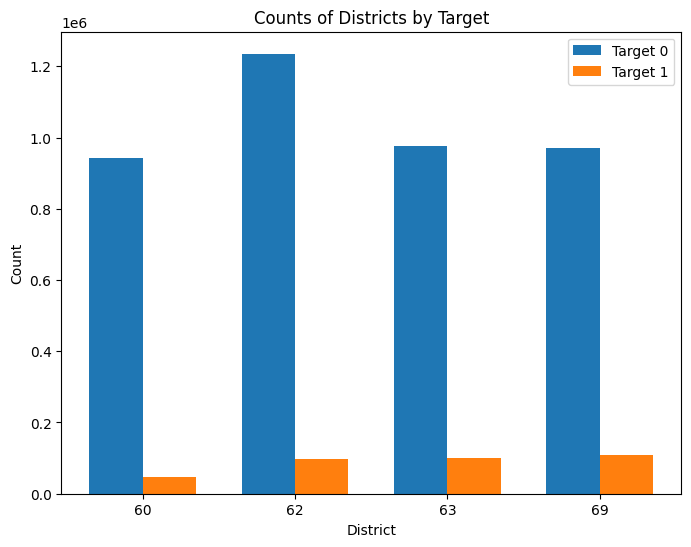

In [8]:
# Group by district and target, then count occurrences
grouped = df.groupby(["district", "target"]).size().unstack(fill_value=0)

# Create positions for each district
districts = grouped.index
x = np.arange(len(districts))
width = 0.35  # Width of each bar

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
bars_target0 = ax.bar(x - width / 2, grouped[0], width, label="Target 0")
bars_target1 = ax.bar(x + width / 2, grouped[1], width, label="Target 1")

# Add labels and title
ax.set_xlabel("District")
ax.set_ylabel("Count")
ax.set_title("Counts of Districts by Target")
ax.set_xticks(x)
ax.set_xticklabels(districts)
ax.legend()

plt.show()

In [10]:
# Removes the string part of the column to then give the number
df["client_id"] = df["client_id"].apply(lambda x: x.split("_")[-1])
df["client_id"] = df["client_id"].astype(int)
# Convert the target column to a numeric type

In [11]:
# Removes the string part of the column to then give the number
df_test["client_id"] = df_test["client_id"].apply(lambda x: x.split("_")[-1])
df_test["client_id"] = df_test["client_id"].astype(int)
# Convert the target column to a numeric type

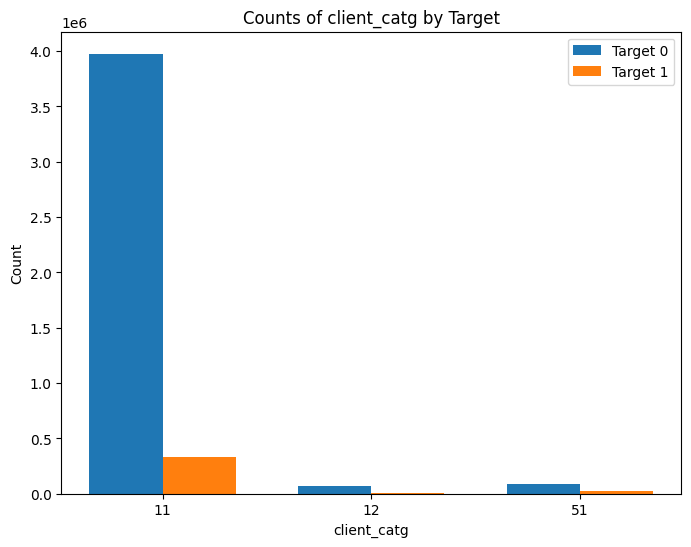

In [14]:
# Group by client_catg and target, then count occurrences
grouped = df.groupby(["client_catg", "target"]).size().unstack(fill_value=0)

# Create positions for each district
client_catg = grouped.index
x = np.arange(len(client_catg))
width = 0.35  # Width of each bar

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
bars_target0 = ax.bar(x - width / 2, grouped[0], width, label="Target 0")
bars_target1 = ax.bar(x + width / 2, grouped[1], width, label="Target 1")

# Add labels and title
ax.set_xlabel("client_catg")
ax.set_ylabel("Count")
ax.set_title("Counts of client_catg by Target")
ax.set_xticks(x)
ax.set_xticklabels(client_catg)
ax.legend()

plt.show()

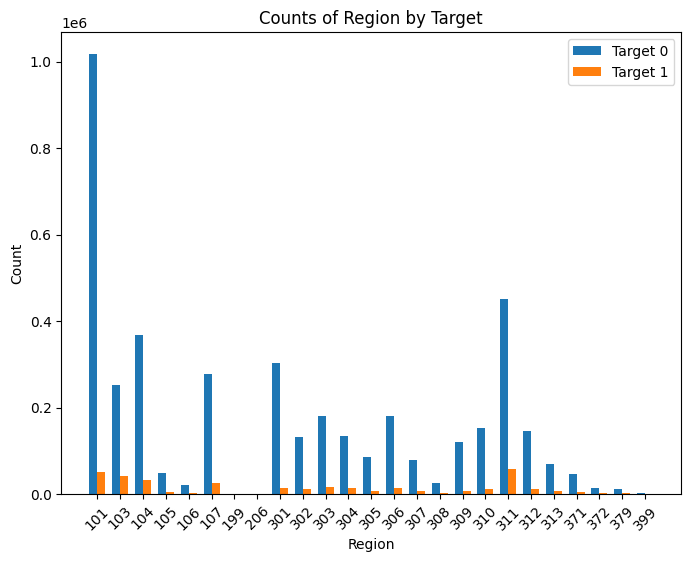

In [17]:
# Group by region and target, then count occurrences
grouped = df.groupby(["region", "target"]).size().unstack(fill_value=0)

# Create positions for each district
region = grouped.index
x = np.arange(len(region))
width = 0.35  # Width of each bar

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
bars_target0 = ax.bar(x - width / 2, grouped[0], width, label="Target 0")
bars_target1 = ax.bar(x + width / 2, grouped[1], width, label="Target 1")

# Add labels and title
ax.set_xlabel("Region")
ax.set_ylabel("Count")
ax.set_title("Counts of Region by Target")
ax.set_xticks(x)
ax.set_xticklabels(region, rotation=45)
ax.legend()

plt.show()

103, 104, 311, 107. 101 to be looked at further

separate into years and then months. 

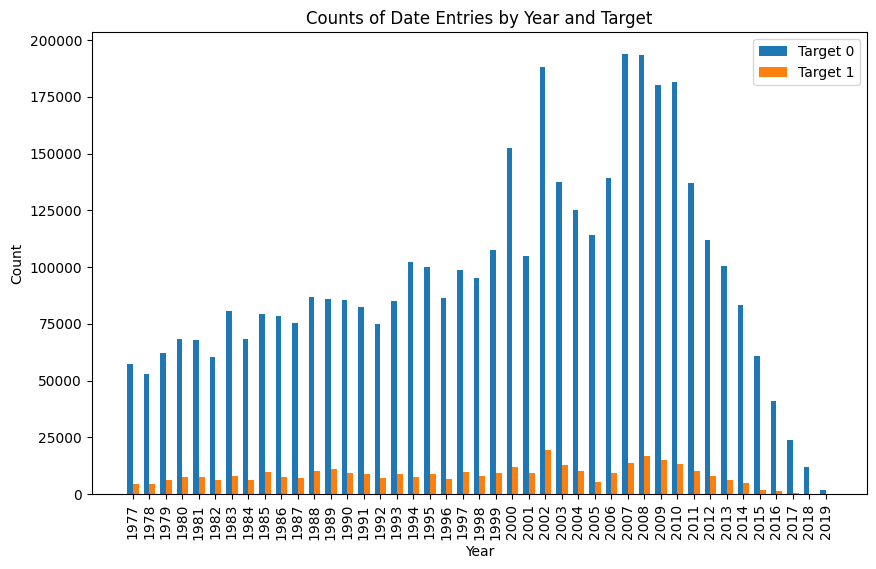

In [19]:
# Extract the year from the 'date' column
df["year"] = df["creation_date"].dt.year

# Group by year and target, then count the occurrences
grouped = df.groupby(["year", "target"]).size().unstack(fill_value=0)

# Create positions for each year and plot the bars
years = grouped.index
x = np.arange(len(years))
width = 0.35  # Width of each bar

fig, ax = plt.subplots(figsize=(10, 6))
bars_target0 = ax.bar(x - width / 2, grouped[0], width, label="Target 0")
bars_target1 = ax.bar(x + width / 2, grouped[1], width, label="Target 1")

# Customize the plot with labels, title, and legend
ax.set_xlabel("Year")
ax.set_ylabel("Count")
ax.set_title("Counts of Date Entries by Year and Target")
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=90)
ax.legend()

plt.show()

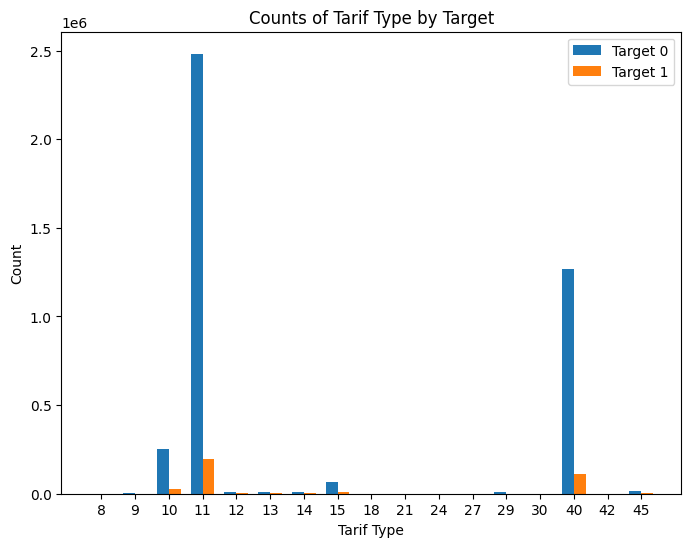

In [23]:
# Group by district and target, then count occurrences
grouped = df.groupby(["tarif_type", "target"]).size().unstack(fill_value=0)

# Create positions for each district
tarif = grouped.index
x = np.arange(len(tarif))
width = 0.35  # Width of each bar

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
bars_target0 = ax.bar(x - width / 2, grouped[0], width, label="Target 0")
bars_target1 = ax.bar(x + width / 2, grouped[1], width, label="Target 1")

# Add labels and title
ax.set_xlabel("Tarif Type")
ax.set_ylabel("Count")
ax.set_title("Counts of Tarif Type by Target")
ax.set_xticks(x)
ax.set_xticklabels(tarif)
ax.legend()

plt.show()

a mixture of strings and integers. homogonise before model!!!
Percentages are higher for strings. 

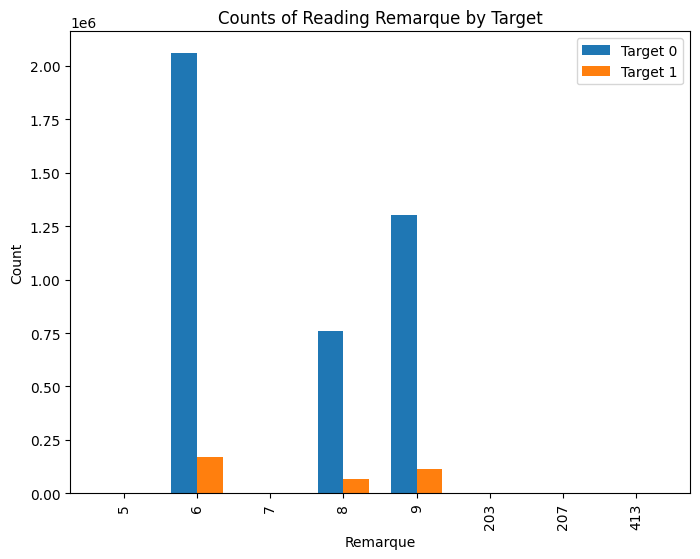

In [28]:
# Group by remarque and target, then count occurrences
grouped = df.groupby(["reading_remarque", "target"]).size().unstack(fill_value=0)

# Create positions for each code
remarque = grouped.index
x = np.arange(len(remarque))
width = 0.35  # Width of each bar

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
bars_target0 = ax.bar(x - width / 2, grouped[0], width, label="Target 0")
bars_target1 = ax.bar(x + width / 2, grouped[1], width, label="Target 1")

# Add labels and title
ax.set_xlabel("Remarque")
ax.set_ylabel("Count")
ax.set_title("Counts of Reading Remarque by Target")
ax.set_xticks(x)
ax.set_xticklabels(remarque, rotation=90)
ax.legend()

plt.show()

interesting discrepencies. look at odd and evens on the chart. also look at is zero.

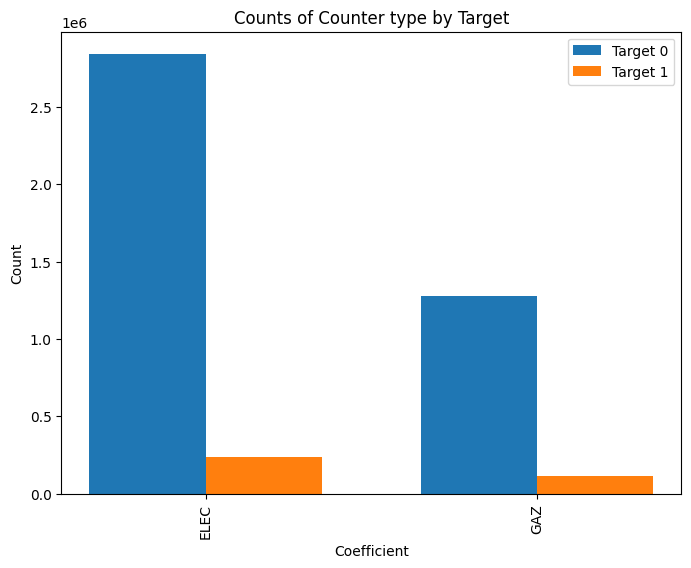

In [30]:
# Group by counter type and target, then count occurrences
grouped = df.groupby(["counter_type", "target"]).size().unstack(fill_value=0)

# Create positions for each code
counter_type = grouped.index
x = np.arange(len(counter_type))
width = 0.35  # Width of each bar

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
bars_target0 = ax.bar(x - width / 2, grouped[0], width, label="Target 0")
bars_target1 = ax.bar(x + width / 2, grouped[1], width, label="Target 1")

# Add labels and title
ax.set_xlabel("Coefficient")
ax.set_ylabel("Count")
ax.set_title("Counts of Counter type by Target")
ax.set_xticks(x)
ax.set_xticklabels(counter_type, rotation=90)
ax.legend()

plt.show()

## 3. DATA Cleaning

In [ ]:
# Define a mapping dictionary once
counter_statue_map = {
    0: 0,
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    5: 5,
    769: 5,
    "0": 0,
    "5": 5,
    "1": 1,
    "4": 4,
    "A": 0,
    618: 5,
    269375: 5,
    46: 5,
    420: 5,
}

# Apply the mapping to both DataFrames
df["counter_statue"] = df["counter_statue"].map(counter_statue_map)
df_test["counter_statue"] = df_test["counter_statue"].map(counter_statue_map)

In [32]:
# drop the columns that are not needed from the reading remarque
filtered_df = df[df["reading_remarque"].isin([203, 413, 207])]
df = df[~df["reading_remarque"].isin([203, 207, 413])]

In [33]:
# Binary code for counter type
df["counter_type"] = df["counter_type"].map({"GAZ": 0, "ELEC": 1})
df_test["counter_type"] = df_test["counter_type"].map({"GAZ": 0, "ELEC": 1})

In [ ]:
# Replace values > 12 with NaN
def clean_months_number(df, col="months_number"):
    # Replace values > 12 with NaN
    df.loc[df[col] > 12, col] = None
    # Interpolate missing values
    df[col] = df[col].interpolate(method="linear")
    # Round the interpolated values to the nearest integer
    df[col] = df[col].round()
    # Clip the values to ensure they are within the range [1, 12]
    df[col] = df[col].clip(1, 12)
    # Optionally convert to integer type
    df[col] = df[col].astype("Int64")
    return df


# Apply to both DataFrames
df = clean_months_number(df)
df_test = clean_months_number(df_test)

### 4. Basic Model Decision Tree
___

Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93   1030848
         1.0       0.17      0.17      0.17     88331

    accuracy                           0.87   1119179
   macro avg       0.55      0.55      0.55   1119179
weighted avg       0.87      0.87      0.87   1119179



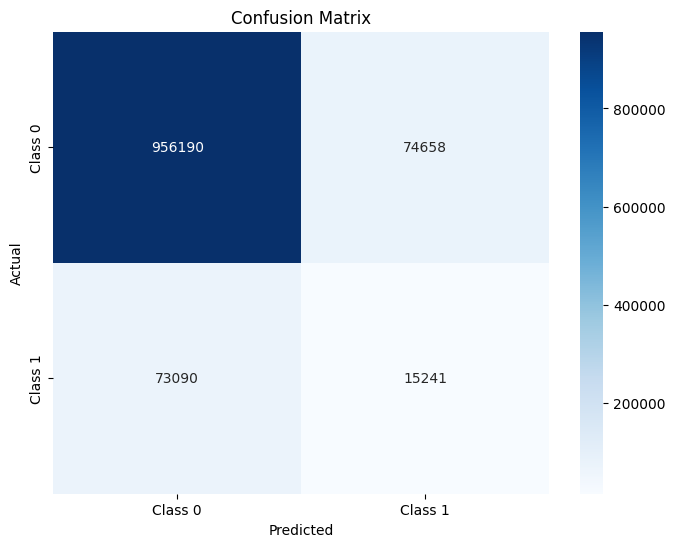

ROC-AUC Score: 0.5513


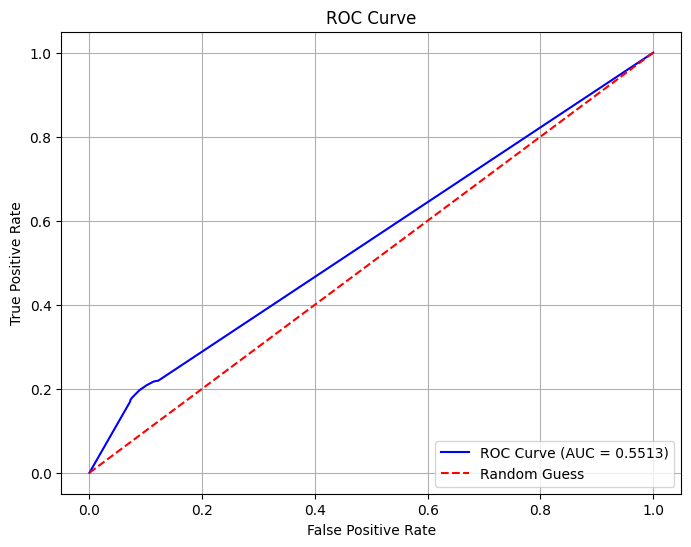

In [35]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
import seaborn as sns
import matplotlib.pyplot as plt

# Select the specified columns for features (X) and target (y)
columns_base = [
    "region",
    "tarif_type",
    "reading_remarque",
    "counter_coefficient",
    "consommation_level_1",
    "consommation_level_2",
    "consommation_level_3",
    "consommation_level_4",
    "old_index",
    "new_index",
]
X_base = df[columns_base]
y_base = df["target"]

# Ensure categorical columns are properly encoded (if necessary)
X_base = pd.get_dummies(X_base, drop_first=True)

# Split the data into training and testing sets
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(
    X_base, y_base, test_size=0.25, random_state=42
)

# Initialize the Decision Tree Classifier
dt_model_base = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model_base.fit(X_train_base, y_train_base)

# Make predictions
y_pred_base = dt_model_base.predict(X_test_base)

# Evaluate the model
accuracy_base = accuracy_score(y_test_base, y_pred_base)
print(f"Accuracy: {accuracy_base:.2f}")
print("\nClassification Report:")
print(classification_report(y_test_base, y_pred_base))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_base, y_pred_base)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Class 0", "Class 1"],
    yticklabels=["Class 0", "Class 1"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC-AUC Score and ROC Curve
if hasattr(dt_model_base, "predict_proba"):
    y_pred_proba_base = dt_model_base.predict_proba(X_test_base)[:, 1]
    auc_score = roc_auc_score(y_test_base, y_pred_proba_base)
    print(f"ROC-AUC Score: {auc_score:.4f}")

    fpr, tpr, thresholds = roc_curve(y_test_base, y_pred_proba_base)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})", color="blue")
    plt.plot([0, 1], [0, 1], "k--", label="Random Guess", color="red")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()
else:
    print("ROC-AUC and ROC curve not available for this model.")

### 5. Feature Engineering

### Set cat. variables

In [36]:
# Calculate the number of months since the client's creation date
df["client_since"] = (2019 - df["creation_date"].dt.year) * 12 - df[
    "creation_date"
].dt.month

In [37]:
# Extract the month from 'creation_date'
df["creation_month"] = df["creation_date"].dt.month

# Extract the year from 'creation_date'
df["creation_year"] = df["creation_date"].dt.year

# Determine if the 'creation_date' falls on a weekday (1 for weekday, 0 for weekend)
df["is_weekday"] = ((pd.DatetimeIndex(df["creation_date"]).dayofweek) // 5 == 0).astype(
    float
)

In [38]:
# Convert 'region' column to categorical type
df["region"] = df["region"].astype("category")

# Create 'region_group' column based on conditions
df["region_group"] = df["region"].apply(
    lambda x: 100 if x < 100 else 300 if x > 300 else 200
)

In [39]:
# Create new columns to indicate if consommation levels are billed (True if > 0, False if 0)
df["is_billed_level_1"] = df["consommation_level_1"] > 0
df["is_billed_level_2"] = df["consommation_level_2"] > 0
df["is_billed_level_3"] = df["consommation_level_3"] > 0
df["is_billed_level_4"] = df["consommation_level_4"] > 0

# Verify the changes
df[
    [
        "consommation_level_1",
        "is_billed_level_1",
        "consommation_level_2",
        "is_billed_level_2",
        "consommation_level_3",
        "is_billed_level_3",
        "consommation_level_4",
        "is_billed_level_4",
    ]
].head()

,consommation_level_1,is_billed_level_1,consommation_level_2,is_billed_level_2,consommation_level_3,is_billed_level_3,consommation_level_4,is_billed_level_4
0,82,True,0,False,0,False,0,False
1,1200,True,184,True,0,False,0,False
2,123,True,0,False,0,False,0,False
3,102,True,0,False,0,False,0,False
4,572,True,0,False,0,False,0,False


In [40]:
# Define numerical columns
numerical_columns = [
    "consommation_level_1",
    "consommation_level_2",
    "consommation_level_3",
    "consommation_level_4",
    "old_index",
    "new_index",
    "months_number",
    "client_since",
    "creation_month",
    "creation_year",
    "is_weekday",
]

# Convert columns to categorical
categorical_columns = [
    "district",
    "client_catg",
    "region",
    "tarif_type",
    "counter_statue",
    "counter_code",
    "reading_remarque",
    "counter_type",
    "region_group",
    "is_billed_level_1",
    "is_billed_level_2",
    "is_billed_level_3",
    "is_billed_level_4",
]

for col in categorical_columns:
    df[col] = df[col].astype("category")

# Drop unnecessary columns
columns_to_drop = ["client_id", "creation_date", "invoice_date"]
df = df.drop(columns=columns_to_drop, errors="ignore")

# Verify the changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4476716 entries, 0 to 4476748
Data columns (total 29 columns):
 #   Column                Dtype   
---  ------                -----   
 0   district              category
 1   client_catg           category
 2   region                category
 3   target                float64 
 4   tarif_type            category
 5   counter_number        int64   
 6   counter_statue        category
 7   counter_code          category
 8   reading_remarque      category
 9   counter_coefficient   int64   
 10  consommation_level_1  int64   
 11  consommation_level_2  int64   
 12  consommation_level_3  int64   
 13  consommation_level_4  int64   
 14  old_index             int64   
 15  new_index             int64   
 16  months_number         Int64   
 17  counter_type          category
 18  year                  int32   
 19  month                 int32   
 20  client_since          int32   
 21  creation_month        int32   
 22  creation_year         i

In [41]:
sub_client_id = df_test["client_id"]

In [ ]:
# from sklearn.ensemble import IsolationForest
# import numpy as np
# import pandas as pd

# # Initialize the Isolation Forest
# iso_forest = IsolationForest(
#     n_estimators=100,
#     max_samples="auto",
#     contamination=0.0078,  # Assume 10% of the data are anomalies
#     random_state=42,
# )

In [42]:
# --- Apply the same feature engineering to df_test as to df ---

# Calculate the number of months since the client's creation date
df_test["client_since"] = (2019 - df_test["creation_date"].dt.year) * 12 - df_test[
    "creation_date"
].dt.month

# Extract the month from 'creation_date'
df_test["creation_month"] = df_test["creation_date"].dt.month

# Extract the year from 'creation_date'
df_test["creation_year"] = df_test["creation_date"].dt.year

# Determine if the 'creation_date' falls on a weekday (1 for weekday, 0 for weekend)
df_test["is_weekday"] = (
    (pd.DatetimeIndex(df_test["creation_date"]).dayofweek) // 5 == 0
).astype(float)

# Convert 'region' column to categorical type
df_test["region"] = df_test["region"].astype("category")

# Create 'region_group' column based on conditions
df_test["region_group"] = df_test["region"].apply(
    lambda x: 100 if x < 100 else 300 if x > 300 else 200
)

# Create new columns to indicate if consommation levels are billed (True if > 0, False if 0)
df_test["is_billed_level_1"] = df_test["consommation_level_1"] > 0
df_test["is_billed_level_2"] = df_test["consommation_level_2"] > 0
df_test["is_billed_level_3"] = df_test["consommation_level_3"] > 0
df_test["is_billed_level_4"] = df_test["consommation_level_4"] > 0

# Convert columns to categorical
for col in categorical_columns:
    df_test[col] = df_test[col].astype("category")

# Drop unnecessary columns
df_test = df_test.drop(columns=columns_to_drop, errors="ignore")

# Verify the changes
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1939730 entries, 0 to 1939729
Data columns (total 26 columns):
 #   Column                Dtype   
---  ------                -----   
 0   district              category
 1   client_catg           category
 2   region                category
 3   tarif_type            category
 4   counter_number        int64   
 5   counter_statue        category
 6   counter_code          category
 7   reading_remarque      category
 8   counter_coefficient   int64   
 9   consommation_level_1  int64   
 10  consommation_level_2  int64   
 11  consommation_level_3  int64   
 12  consommation_level_4  int64   
 13  old_index             int64   
 14  new_index             int64   
 15  months_number         Int64   
 16  counter_type          category
 17  client_since          int32   
 18  creation_month        int32   
 19  creation_year         int32   
 20  is_weekday            float64 
 21  region_group          category
 22  is_billed_level_1 

Detect Anomalies with isoforest

In [24]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest
iso_forest = IsolationForest(
    n_estimators=100,
    max_samples="auto",
    contamination=0.0078,  # Adjust based on expected anomaly proportion
    random_state=42,
)

# Fit the model
iso_forest.fit(df)

# Predict anomalies
predictions = iso_forest.predict(df)

# Add predictions to the DataFrame
df["anomaly"] = predictions
print(df)

        district client_catg region  target tarif_type  counter_number   
0             60          11    101     0.0         11         1335667  \
1             60          11    101     0.0         11         1335667   
2             60          11    101     0.0         11         1335667   
3             60          11    101     0.0         11         1335667   
4             60          11    101     0.0         11         1335667   
...          ...         ...    ...     ...        ...             ...   
4476744       60          11    101     0.0         10         1253571   
4476745       60          11    101     0.0         10         1253571   
4476746       60          11    101     0.0         11          560948   
4476747       60          11    101     0.0         11          560948   
4476748       60          11    101     0.0         11          560948   

        counter_statue counter_code reading_remarque  counter_coefficient   
0                    0          20

In [25]:
anomaly_scores = iso_forest.decision_function(df.drop(columns=["anomaly"]))
df["anomaly_score"] = anomaly_scores
print(df)

        district client_catg region  target tarif_type  counter_number   
0             60          11    101     0.0         11         1335667  \
1             60          11    101     0.0         11         1335667   
2             60          11    101     0.0         11         1335667   
3             60          11    101     0.0         11         1335667   
4             60          11    101     0.0         11         1335667   
...          ...         ...    ...     ...        ...             ...   
4476744       60          11    101     0.0         10         1253571   
4476745       60          11    101     0.0         10         1253571   
4476746       60          11    101     0.0         11          560948   
4476747       60          11    101     0.0         11          560948   
4476748       60          11    101     0.0         11          560948   

        counter_statue counter_code reading_remarque  counter_coefficient   
0                    0          20

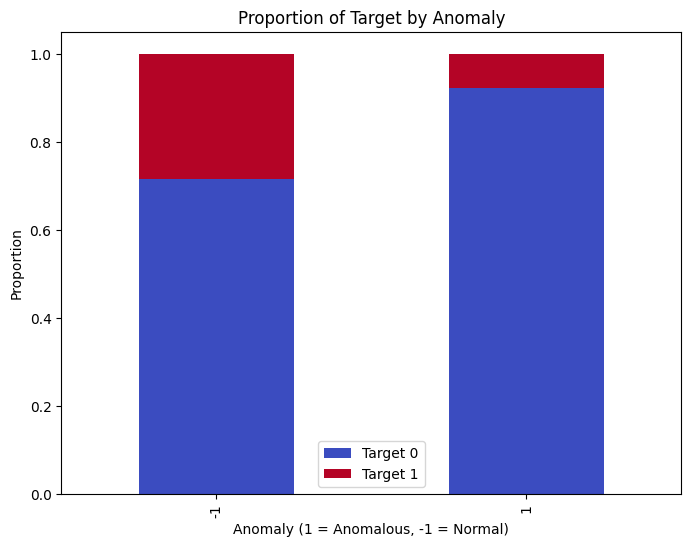

In [ ]:
anomaly_target_distribution = (
    df.groupby("anomaly")["target"].value_counts(normalize=True).unstack()
)
anomaly_target_distribution.plot(
    kind="bar", stacked=True, figsize=(8, 6), colormap="coolwarm"
)
plt.title("Proportion of Target by Anomaly")
plt.xlabel("Anomaly (1 = Anomalous, -1 = Normal)")
plt.ylabel("Proportion")
plt.legend(["Target 0", "Target 1"])
plt.show()

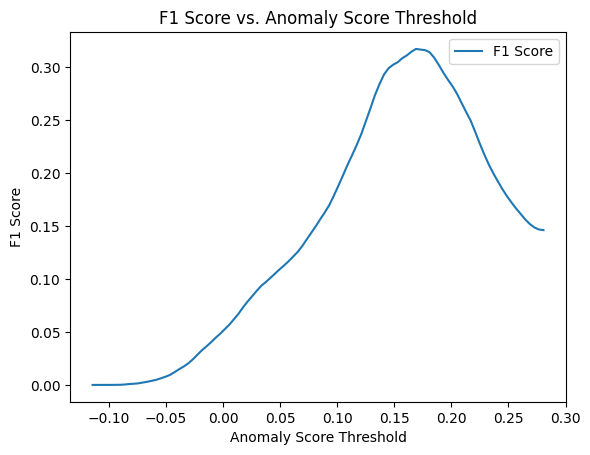

In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score

thresholds = np.linspace(df["anomaly_score"].min(), df["anomaly_score"].max(), 100)
f1_scores = []
for threshold in thresholds:
    df["anomaly_custom"] = (df["anomaly_score"] < threshold).astype(int)
    f1 = f1_score(df["target"], df["anomaly_custom"])
    f1_scores.append(f1)

plt.plot(thresholds, f1_scores, label="F1 Score")
plt.xlabel("Anomaly Score Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs. Anomaly Score Threshold")
plt.legend()
plt.show()

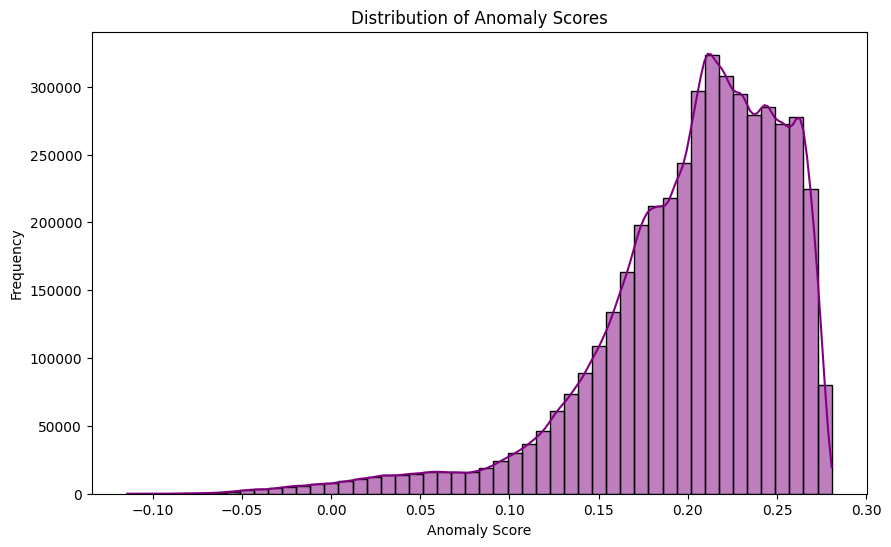

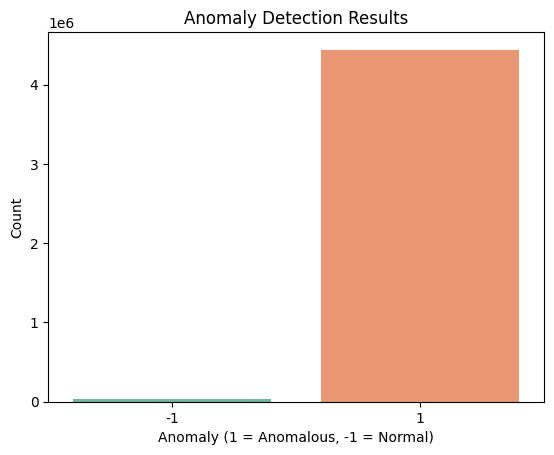

In [ ]:
# Scatter plot of anomaly scores
plt.figure(figsize=(10, 6))
sns.histplot(df["anomaly_score"], bins=50, kde=True, color="purple")
plt.title("Distribution of Anomaly Scores")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.show()

# Countplot of anomalies
sns.countplot(x="anomaly", data=df, palette="Set2")
plt.title("Anomaly Detection Results")
plt.xlabel("Anomaly (1 = Anomalous, -1 = Normal)")
plt.ylabel("Count")
plt.show()

In [ ]:
# Filter the dataset to include only non-anomalous data
df_cleaned = df[df["anomaly"] == -1]

# Separate features (X) and target (y)
X_cleaned = df_cleaned.drop(columns=["target"])
y_cleaned = df_cleaned["target"]

# Split the data into training and testing sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned, y_cleaned, test_size=0.33, random_state=42
)

# Verify the shapes of the resulting datasets
print("X_train shape:", X_train_cleaned.shape)
print("X_test shape:", X_test_cleaned.shape)
print("y_train shape:", y_train_cleaned.shape)
print("y_test shape:", y_test_cleaned.shape)

## 6. Train the model & create submission file

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import fbeta_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import time
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [29]:
num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ]
)
cat_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# Combine pipelines into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, numerical_columns),
        ("cat", cat_pipeline, categorical_columns),
    ]
)

Apply oversampling with SMOTE

[LightGBM] [Info] Number of positive: 1381407, number of negative: 2762814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.487023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9090
[LightGBM] [Info] Number of data points in the train set: 4144221, number of used features: 112
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
Accuracy: 0.5177

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.49      0.65   1360790
         1.0       0.12      0.85      0.22    116527

    accuracy                           0.52   1477317
   macro avg       0.55      0.67      0.43   1477317
weighted avg       0.91      0.52      0.62   1477317


Confusion Matrix:


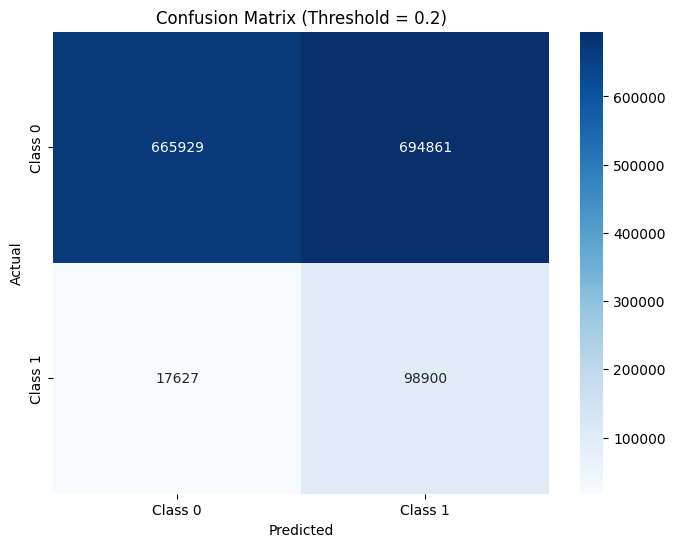

F1 Score: 0.2173
AUC Score: 0.7664


In [ ]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop(columns=["target"])
y = df["target"]

# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y
)

# Preprocess the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

# Initialize the LGBMClassifier
lgb_model = LGBMClassifier(
    random_state=42,
    boosting_type="gbdt",
    n_estimators=500,
)

# Train the model on the resampled data
lgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_proba = lgb_model.predict_proba(X_test_transformed)[:, 1]
y_pred = (y_pred_proba >= 0.2).astype(int)  # Adjusted threshold to 0.2

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Class 0", "Class 1"],
    yticklabels=["Class 0", "Class 1"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Threshold = 0.2)")
plt.show()

# F1 Score
f1_score = fbeta_score(y_test, y_pred, beta=1)
print(f"F1 Score: {f1_score:.4f}")

# ROC-AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.4f}")

Model improvement

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop(columns=["target"])
y = df["target"]

# Split the data for validation (optional, for local evaluation)
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

# Preprocess the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)

# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

# Initialize the LGBMClassifier
lgb_model = LGBMClassifier(
    random_state=42,
    boosting_type="gbdt",
    n_estimators=500,
)

# Train the model on the resampled data
lgb_model.fit(X_train_resampled, y_train_resampled)

# --- Predict on df_test (no target column) ---
X_test_final = preprocessor.transform(df_test)
y_test_pred_proba = lgb_model.predict_proba(X_test_final)[:, 1]

# Prepare submission DataFrame with probabilities
submission = pd.DataFrame({"client_id": sub_client_id, "target": y_test_pred_proba})

submission.head()
submission.to_csv("submission.csv", index=False)

[LightGBM] [Info] Number of positive: 1030901, number of negative: 2061802
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.261911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9123
[LightGBM] [Info] Number of data points in the train set: 3092703, number of used features: 114
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147


,client_id,target
0,test_Client_0,0.150314
1,test_Client_0,0.154517
2,test_Client_0,0.375838
3,test_Client_0,0.300518
4,test_Client_0,0.274207


Evaluation on test set

Accuracy: 0.9060

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95   1360790
         1.0       0.36      0.26      0.30    116527

    accuracy                           0.91   1477317
   macro avg       0.65      0.61      0.63   1477317
weighted avg       0.89      0.91      0.90   1477317


Confusion Matrix:


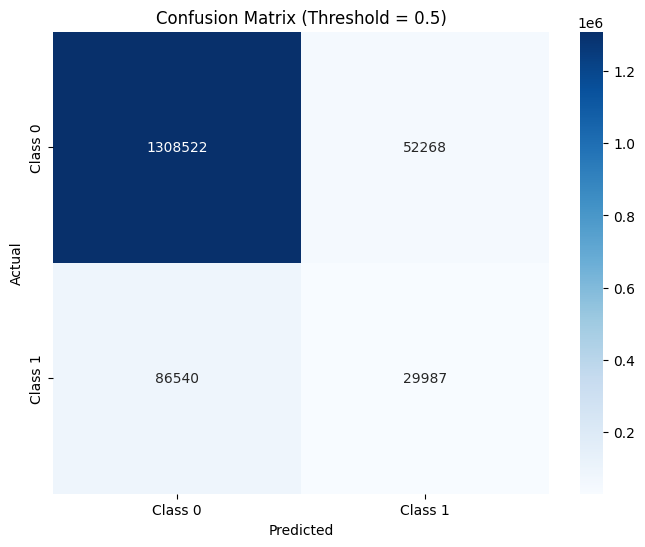

F1 Score: 0.3017
AUC Score: 0.7664


In [35]:
# Make predictions
y_pred_proba = lgb_model.predict_proba(X_test_transformed)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)  # Adjusted threshold to 0.3

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Class 0", "Class 1"],
    yticklabels=["Class 0", "Class 1"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Threshold = 0.5)")
plt.show()

# F1 Score
f1_score = fbeta_score(y_test, y_pred, beta=1)
print(f"F1 Score: {f1_score:.4f}")

# ROC-AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.4f}")

[LightGBM] [Info] Number of positive: 236585, number of negative: 2762814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.117028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2064
[LightGBM] [Info] Number of data points in the train set: 2999399, number of used features: 114
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.078877 -> initscore=-2.457697
[LightGBM] [Info] Start training from score -2.457697
Accuracy: 0.9271

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96   1360790
         1.0       0.93      0.08      0.15    116527

    accuracy                           0.93   1477317
   macro avg       0.93      0.54      0.56   1477317
weighted avg       0.93      0.93      0.90   1477317


Confusion Matrix:


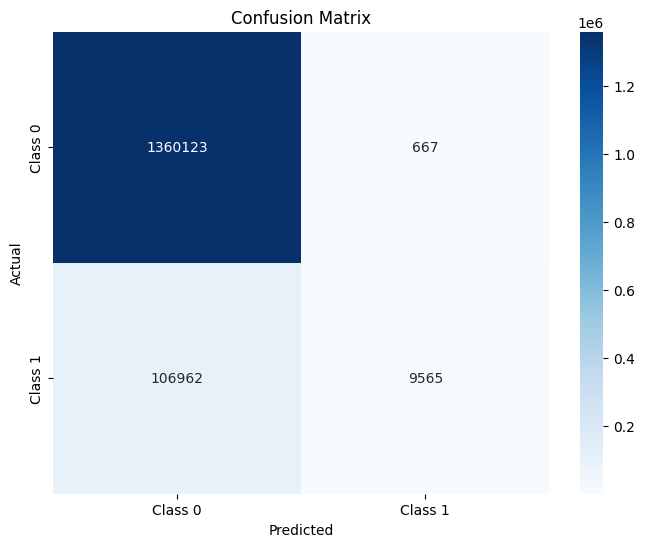

F1 Score: 0.1509
AUC Score: 0.8012


In [49]:
# Preprocess the data (if not already done)
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Initialize the LGBMClassifier
lgb_model = LGBMClassifier(
    random_state=42,
    boosting_type="gbdt",
    n_estimators=500,
)

# Train the model
lgb_model.fit(X_train_transformed, y_train)

# Make predictions
y_pred = lgb_model.predict(X_test_transformed)
y_pred_proba = lgb_model.predict_proba(X_test_transformed)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Class 0", "Class 1"],
    yticklabels=["Class 0", "Class 1"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
f1_score = fbeta_score(y_test, y_pred, beta=1)
print(f"F1 Score: {f1_score:.4f}")
# ROC-AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.4f}")


Classification Report (Adjusted Threshold):
              precision    recall  f1-score   support

         0.0       0.97      0.49      0.65   1360790
         1.0       0.12      0.85      0.22    116527

    accuracy                           0.52   1477317
   macro avg       0.55      0.67      0.43   1477317
weighted avg       0.91      0.52      0.62   1477317



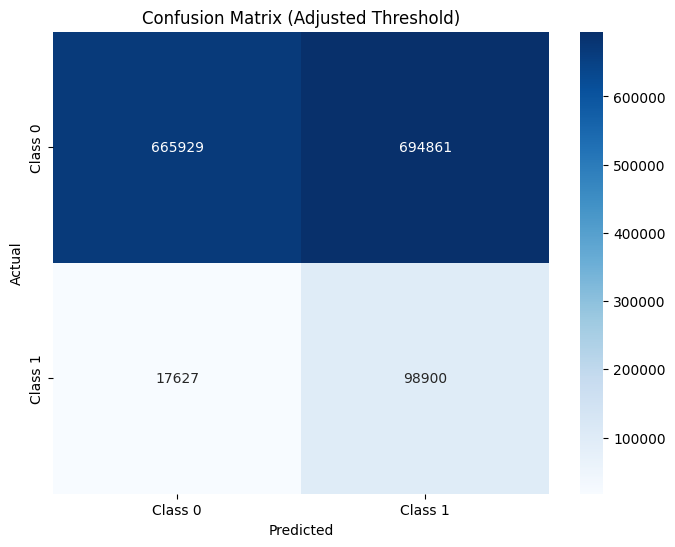

AUC Score: 0.7664


In [36]:
# Adjust the threshold
threshold = 0.2  # Example threshold
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Evaluate with the adjusted threshold
print("\nClassification Report (Adjusted Threshold):")
print(classification_report(y_test, y_pred_adjusted))

# Confusion matrix for adjusted threshold
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_adjusted,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Class 0", "Class 1"],
    yticklabels=["Class 0", "Class 1"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Adjusted Threshold)")
plt.show()
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.4f}")

Improvement with LGBM

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer, fbeta_score
import numpy as np

# Define the pipeline with SMOTE and LGBMClassifier
pipeline = ImbPipeline(
    steps=[
        ("preprocessor", preprocessor),  # Use the preprocessor defined earlier
        ("smote", SMOTE(sampling_strategy=0.5, random_state=42)),
        ("classifier", LGBMClassifier(random_state=42, boosting_type="gbdt")),
    ]
)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__learning_rate": [0.01, 0.05, 0.1],
    "classifier__max_depth": [3, 5, 7],
    "classifier__num_leaves": [15, 31, 63],
    "classifier__min_child_samples": [20, 50, 100],
    "classifier__subsample": [0.8, 1.0],
    "classifier__colsample_bytree": [0.8, 1.0],
}

# Define the scoring metric
scorer = make_scorer(fbeta_score, beta=1)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings sampled
    scoring=scorer,
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1,  # Use all available cores
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Output the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

In [ ]:
# # Extract the best model
# best_model = random_search.best_estimator_

Best model:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer, fbeta_score
import numpy as np

# SAMPLE 10% OF DATA FOR FASTER HYPERPARAMETER SEARCH
df_sampled = df.sample(frac=0.1, random_state=42)

# Define features and target from the sampled data
X = df_sampled.drop(columns=["target"])
y = df_sampled["target"]

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

# Define the pipeline with SMOTE and LGBMClassifier
pipeline = ImbPipeline(
    steps=[
        ("preprocessor", preprocessor),  # Use the preprocessor defined earlier
        ("smote", SMOTE(sampling_strategy=0.5, random_state=42)),
        ("classifier", LGBMClassifier(random_state=42, boosting_type="gbdt")),
    ]
)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__learning_rate": [0.01, 0.05, 0.1],
    "classifier__max_depth": [3, 5, 7],
    "classifier__num_leaves": [15, 31, 63],
    "classifier__min_child_samples": [20, 50, 100],
    "classifier__subsample": [0.8, 1.0],
    "classifier__colsample_bytree": [0.8, 1.0],
}

# Define the scoring metric (F1 or F2 for fraud, here F2 for more recall)
scorer = make_scorer(fbeta_score, beta=2)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings sampled
    scoring=scorer,
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=2,  # Use 2 cores
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Output the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best F2 Score:", random_search.best_score_)

# Evaluate on validation set
best_model = random_search.best_estimator_
y_val_pred_proba = best_model.predict_proba(X_val)[:, 1]
y_val_pred = (y_val_pred_proba >= 0.2).astype(int)  # adjust threshold as needed

print("\nValidation F2 Score:", fbeta_score(y_val, y_val_pred, beta=2))

# Predict on test set for submission
X_test_final = preprocessor.transform(df_test)
y_test_pred_proba = best_model.named_steps["classifier"].predict_proba(X_test_final)[:, 1]

submission = pd.DataFrame({
    "client_id": sub_client_id,
    "target": y_test_pred_proba
})

submission.to_csv("submission.csv", index=False)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     68092
         1.0       0.41      0.05      0.08      5774

    accuracy                           0.92     73866
   macro avg       0.67      0.52      0.52     73866
weighted avg       0.88      0.92      0.89     73866



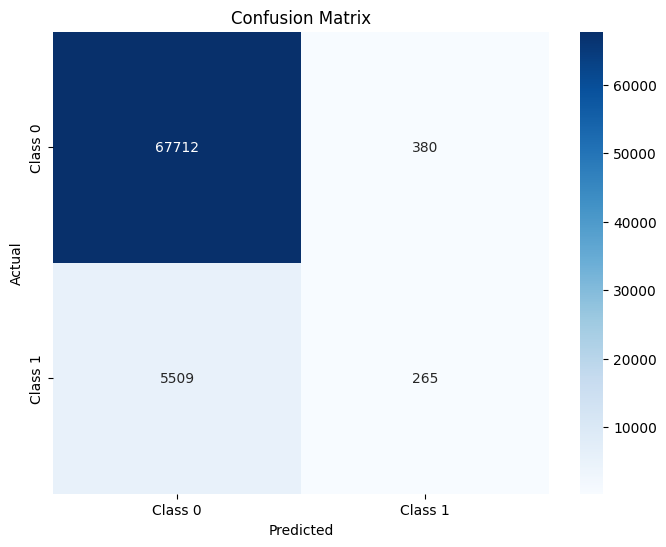

AUC Score: 0.7010


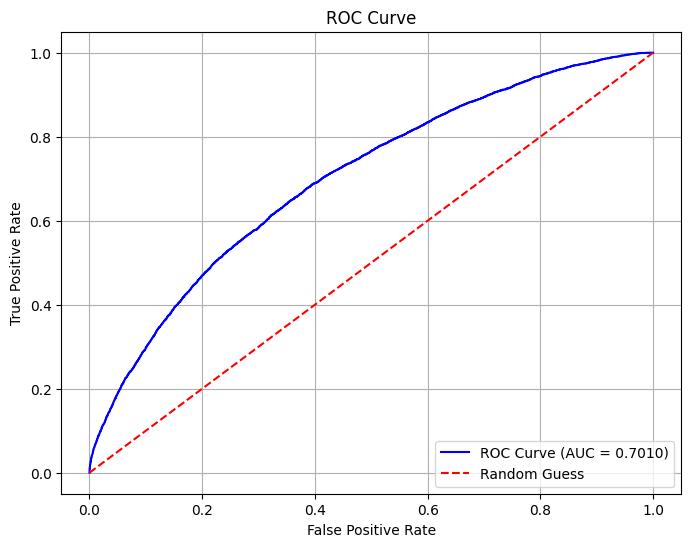

In [ ]:
# # Make predictions on the test set
# y_pred = best_model.predict(X_test)

# # If probabilities are needed (e.g., for ROC-AUC or threshold tuning)
# y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# # Evaluate the model
# from sklearn.metrics import (
#     classification_report,
#     confusion_matrix,
#     roc_auc_score,
#     roc_curve,
# )
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Classification report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# # Confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(
#     conf_matrix,
#     annot=True,
#     fmt="d",
#     cmap="Blues",
#     xticklabels=["Class 0", "Class 1"],
#     yticklabels=["Class 0", "Class 1"],
# )
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix")
# plt.show()

# # ROC-AUC score
# auc_score = roc_auc_score(y_test, y_pred_proba)
# print(f"AUC Score: {auc_score:.4f}")

# # ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})", color="blue")
# plt.plot([0, 1], [0, 1], "k--", label="Random Guess", color="red")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
# plt.legend(loc="lower right")
# plt.grid()
# plt.show()

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from imblearn.pipeline import Pipeline as ImbPipeline
# from imblearn.over_sampling import SMOTE
# from sklearn.metrics import make_scorer, fbeta_score
# import numpy as np

# # Define the pipeline with SMOTE and LGBMClassifier
# pipeline = ImbPipeline(
#     steps=[
#         ("preprocessor", preprocessor),
#         ("smote", SMOTE(sampling_strategy=0.5, random_state=42)),
#         ("classifier", LGBMClassifier(random_state=42, boosting_type="gbdt")),
#     ]
# )

# # Define the parameter grid for RandomizedSearchCV
# param_grid = {
#     "classifier__n_estimators": [50, 100],
#     "classifier__learning_rate": [0.05, 0.1],
#     "classifier__max_depth": [3, 5],
#     "classifier__num_leaves": [15, 31],
#     "classifier__min_child_samples": [50, 100],
#     "classifier__subsample": [0.8, 1.0],
#     "classifier__colsample_bytree": [0.8, 1.0],
# }

# # Define the scoring metric
# scorer = make_scorer(fbeta_score, beta=1)

# # Initialize RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=pipeline,
#     param_distributions=param_grid,
#     n_iter=10,  # Number of parameter settings sampled
#     scoring=scorer,
#     cv=3,  # 3-fold cross-validation
#     verbose=2,
#     random_state=42,
#     n_jobs=-1,  # Use all available cores
# )

# # Fit RandomizedSearchCV
# random_search.fit(X_train, y_train)

# # Best parameters and best score
# print("Best Parameters:", random_search.best_params_)
# print("Best F1 Score:", random_search.best_score_)

# # Evaluate on the test set
# best_model = random_search.best_estimator_
# y_pred = best_model.predict(X_test)
# y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.4f}")

# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# print("\nConfusion Matrix:")
# conf_matrix = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(
#     conf_matrix,
#     annot=True,
#     fmt="d",
#     cmap="Blues",
#     xticklabels=["Class 0", "Class 1"],
#     yticklabels=["Class 0", "Class 1"],
# )
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix")
# plt.show()

# # Calculate F1 Score
# f1_score = fbeta_score(y_test, y_pred, beta=1)
# print(f"F1 Score: {f1_score:.4f}")

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from imblearn.pipeline import Pipeline as ImbPipeline
# from imblearn.over_sampling import SMOTE
# from sklearn.metrics import make_scorer, fbeta_score
# import numpy as np

# # Define the pipeline with SMOTE and LGBMClassifier
# pipeline = ImbPipeline(
#     steps=[
#         ("preprocessor", preprocessor),
#         ("smote", SMOTE(sampling_strategy=0.5, random_state=42)),
#         ("classifier", LGBMClassifier(random_state=42, boosting_type="gbdt")),
#     ]
# )

# # Define the parameter grid for RandomizedSearchCV
# param_grid = {
#     "classifier__n_estimators": [100, 300, 500, 700, 860],
#     "classifier__learning_rate": [0.01, 0.05, 0.1, 0.2],
#     "classifier__max_depth": [3, 5, 7, 10],
#     "classifier__num_leaves": [15, 31, 63, 127],
#     "classifier__min_child_samples": [10, 20, 30, 50],
#     "classifier__subsample": [0.6, 0.8, 1.0],
#     "classifier__colsample_bytree": [0.6, 0.8, 1.0],
# }

# # Define the scoring metric
# scorer = make_scorer(fbeta_score, beta=1)

# # Initialize RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=pipeline,
#     param_distributions=param_grid,
#     n_iter=10,  # Number of parameter settings sampled
#     scoring=scorer,
#     cv=3,  # 3-fold cross-validation
#     verbose=2,
#     random_state=42,
# )

# # Fit RandomizedSearchCV
# random_search.fit(X_train, y_train)

# # Best parameters and best score
# print("Best Parameters:", random_search.best_params_)
# print("Best F1 Score:", random_search.best_score_)

# # Evaluate on the test set
# best_model = random_search.best_estimator_
# y_pred = best_model.predict(X_test)
# y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.4f}")

# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# print("\nConfusion Matrix:")
# conf_matrix = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(
#     conf_matrix,
#     annot=True,
#     fmt="d",
#     cmap="Blues",
#     xticklabels=["Class 0", "Class 1"],
#     yticklabels=["Class 0", "Class 1"],
# )
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix")
# plt.show()

# # Calculate F1 Score
# f1_score = fbeta_score(y_test, y_pred, beta=1)
# print(f"F1 Score: {f1_score:.4f}")